In [53]:
# Load the importatnt libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [54]:
# Load Data Set
books=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 10- RECCOMENDATION SYSTEM/book.csv",encoding='ISO-8859-1')
books

,ï»¿,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [55]:
books1=books.iloc[:,1:]
books1

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [56]:
books2=books1.rename(columns={'User.ID':'UserId','Book.Title':'Book','Book.Rating':'Rating'})
books2

,UserId,Book,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [57]:
books2.duplicated().sum()

2

In [58]:
books2[books2.duplicated()]

,UserId,Book,Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [59]:
books3=books2.drop_duplicates().reset_index(drop=True)
books3

,UserId,Book,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9993,162121,American Fried: Adventures of a Happy Eater.,7
9994,162121,Cannibal In Manhattan,9
9995,162121,How to Flirt: A Practical Guide,7
9996,162121,Twilight,8


In [60]:
books3.sort_values(['UserId'])

,UserId,Book,Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃÂ³nica del PerÃÂº (CrÃÂ³nicas de AmÃ...,7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃÂ­rias,7


In [61]:
# no of Unique Id in data set
len(books3.UserId.unique())

2182

In [62]:
len(books3.Book.unique())

9659

In [63]:
len(books3.Rating.unique())

10

In [64]:
books3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UserId  9998 non-null   int64 
 1   Book    9998 non-null   object
 2   Rating  9998 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [31]:
books3.shape

(9998, 3)

<AxesSubplot: xlabel='Rating', ylabel='count'>

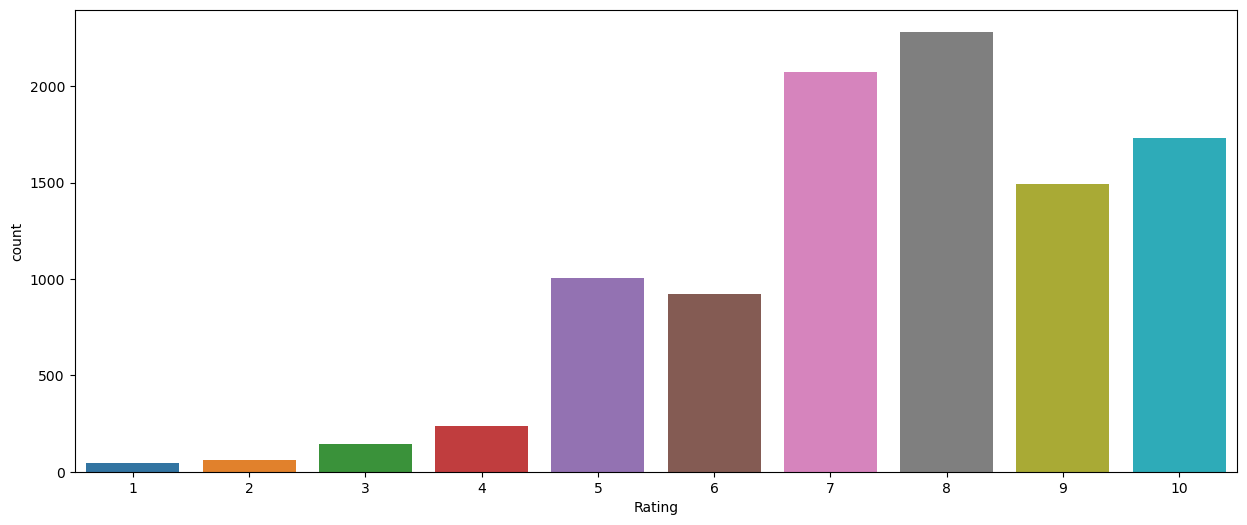

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(x='Rating', data=books3)

#### Majority of rating are between 7 to 10 

# introduction to 'surprice' package

In [ ]:
#!pip install scikit-surprise

In [43]:
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

In [46]:
import surprise
reader=surprise.Reader(rating_scale=(1,10))
reader

In [66]:
data=surprise.Dataset.load_from_df(books3[['UserId','Book','Rating']],reader)
data

In [67]:
trainset,testset=train_test_split(data, test_size=0.2)

# Finding best algorithm for Reccomendation system

In [74]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3195970065.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3195970065.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3195970065.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3195970065.py:9: FutureWarning: The series.append method is deprecate

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3195970065.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3195970065.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3195970065.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3195970065.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3195970065.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


In [75]:
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.684747,0.098693,0.016018
SVDpp,1.685755,0.374532,0.019874
BaselineOnly,1.705859,0.021719,0.020229
KNNBaseline,1.709258,0.030083,0.016484
KNNWithMeans,1.818472,0.041601,0.022309
SlopeOne,1.820498,0.317348,0.016953
KNNBasic,1.823985,0.019047,0.018015
CoClustering,1.855800,0.680334,0.018159
NMF,1.907896,0.393083,0.016164


# SVD Give Us best rsme

# Building reccomendation system using Surprise

In [76]:
algo=SVD()

In [77]:
algo.fit(trainset)

In [91]:
predictions = algo.fit(trainset).test(testset)

In [93]:
surprise.accuracy.rmse(predictions, verbose=True)

RMSE: 1.6753


1.6752655212134664

In [129]:
def recommendation(UserId):
    user = books3.copy()
    already_read = books3[books3['UserId']== UserId]['Book'].unique()
    user = user.reset_index()
    user = user[~user['Book'].isin(already_read)]
    user['Estimate_Score']=user['Book'].apply(lambda x: algo.predict(UserId, x).est)
    #user = user.drop('title', axis = 1)
    user = user.sort_values('Estimate_Score', ascending=False)
    print(user.head(10))


In [130]:
recommendation(278854)

      index  UserId                                               Book  \
1881   1881  278364              The Complete Hot &amp; Spicy Cookbook   
512     512  277195                 The Saints of Big Harbour: A Novel   
6640   6640    3373                       The Word Processing Handbook   
7609   7609    3827                        The Skylark's Song: A Novel   
3756   3756    1178              A Case of Conscience (Del Rey Impact)   
4765   4765    2033                                The End of the Pier   
250     250  276929  Chicken Soup for the Woman's Soul (Chicken Sou...   
9415   9415  161872                                   Died in the Wool   
6778   6778    3543                                       Fatal Dosage   
254     254  276929                                        Night Watch   

      Rating  Estimate_Score  
1881      10        7.972967  
512       10        7.969348  
6640      10        7.932451  
7609      10        7.925411  
3756      10        7.920047  

# Building reccomendation system using correlation system


In [98]:
rating=pd.pivot_table(books3, index='UserId',values='Rating',columns='Book',fill_value=0)

In [112]:
corr = np.corrcoef(rating.T)

In [103]:
book_list=  list(rating)

In [104]:
book_titles =[] 

In [105]:

for i in range(len(book_list)):
    book_titles.append(book_list[i])


In [106]:

book_titles


[' Jason, Madison &amp',
 ' Other Stories;Merril;1985;McClelland &amp',
 ' Repairing PC Drives &amp',
 "'48",
 "'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
 '01-01-00: A Novel of the Millennium',
 '1,401 More Things That P*Ss Me Off',
 '10 Commandments Of Dating',
 '100 Great Fantasy Short, Short Stories',
 '1001 Brilliant Ways to Checkmate',
 '101 Bright Ideas: Esl Activities for All Ages',
 '101 Dalmatians',
 '101 Essential Tips: House Plants',
 '101 Telephone Jokes',
 '101 Wacky Computer Jokes',
 '101 Ways to Make Money at Home',
 '11 Edward Street',
 '11th Hour',
 '13 99 Euros',
 '14,000 Things to Be Happy About',
 '1984',
 '1st to Die: A Novel',
 '20 Jahre 40 bleiben. Jung und schÃ\x83?Ã\x82Â¶n in den besten Jahren.',
 '20 Years of Censored News',
 '20,000 Leagues Under the Sea (Wordsworth Collection)',
 '20,001 Names for Baby',
 '2001 Spanish and English Idioms/2001 Modismos Espanoles E I

In [107]:
def get_recommendation(books_list):
    book_similarities = np.zeros(corr.shape[0])
    
    for book in books_list:
        book_index = book_titles.index(book)
        book_similarities += corr[book_index] 
        book_preferences = []
    for i in range(len(book_titles)):
        book_preferences.append((book_titles[i],book_similarities[i]))
        
    return sorted(book_preferences, key= lambda x: x[1], reverse=True)

In [109]:
my_fav_books = ['Classical Mythology','Clara Callan']

In [114]:
print('The books you might like: \n' , get_recommendation(my_fav_books)[:10])

The books you might like: 
 [('Clara Callan', 0.9995414947271893), ('Classical Mythology', 0.9995414947271893), ('Decision in Normandy', 0.9995414947271893), ('Artemisia: A Novel', -0.0009170105456212565), ('Cathedral (Vintage Contemporaries (Paperback))', -0.0009170105456212565), ('Clear Springs : A Family Story', -0.0009170105456212565), ('Cry Me a River', -0.0009170105456212565), ('Durable Goods', -0.0009170105456212565), ("Fancy Strut (Ballantine Reader's Circle)", -0.0009170105456212565), ("How We Die: Reflections on Life's Final Chapter", -0.0009170105456212565)]
